In [ ]:
# Notebook settings.
%load_ext autoreload
%autoreload 2

In [ ]:
# Imports.
import torchvision
from PIL import Image
from torchvision import transforms
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from noisegrad import NoiseGrad, NoiseGradPlusPlus, image_classification

device = torch.device("cpu")

## Example NoiseGrad and NoiseGrad++

With a few lines of code we show how to use NoiseGrad and NoiseGrad++ with PyTorch, as a way to enhance any explanation method.

• **Paper:** NoiseGrad: enhancing explanations by introducing stochasticity to model weights
• **Authors:** Kirill Bykov\*, Anna Hedström\*, Shinichi Nakajima, Marina M.-C. Höhne
• **Institution:** TU Berlin, ML Department, Understandable Machine Intelligence Lab
• **Date:** June, 2021

*equal contribution


### Step 1. Load data and model

In [2]:
# Load original un-normalised image
image = Image.open(os.path.realpath("..") + "/samples/llama.jpg")

# Transform image to a 224x224 image and normalise pixel values
nr_channels = 3
img_size = 224
transformations = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)
normalised_image = (
    transformations(image).reshape(1, nr_channels, img_size, img_size).to(device)
)

# Set label to a llama imagenet class label
label = 355

# Load pre-trained ResNet18 model.
model = torchvision.models.resnet18(
    weights=torchvision.models.resnet.ResNet18_Weights.IMAGENET1K_V1
)
model.eval()

/Users/artemsereda/Documents/PycharmProjects/NoiseGrad/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/artemsereda/Documents/PycharmProjects/NoiseGrad/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


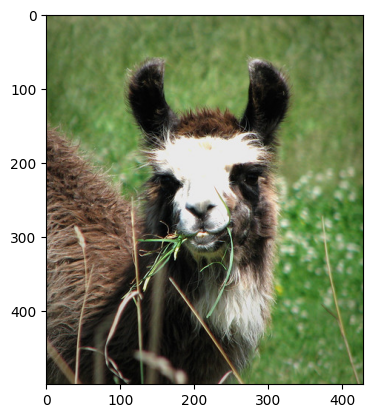

In [3]:
# Show original image
plt.imshow(image)

### Step 2. Initialize methods

In [10]:
# Initialize NoiseGrad: enhance any explanation function!
noisegrad = NoiseGrad(config=dict(n=5))

# Initialize NoiseGrad++: enhance any explanation function!
noisegradp = NoiseGradPlusPlus(config=dict(n=5, m=5))

### Step 3. Get explanations

In [11]:
# Get baseline explanation.
expl_base = image_classification.intgrad_explainer(
    model.to(device), normalised_image, label
)

In [12]:
# Get NoiseGrad explanation.
expl_ng = noisegrad.enhance_explanation(
    model, normalised_image, label, image_classification.intgrad_explainer
)

NoiseGrad:   0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
# Get NoiseGrad++ explanation.
expl_ngp = noisegradp.enhance_explanation(
    model, normalised_image, label, image_classification.intgrad_explainer
)

NoiseGrad++:   0%|          | 0/25 [00:00<?, ?it/s]

### Step 4. Visualize explanations

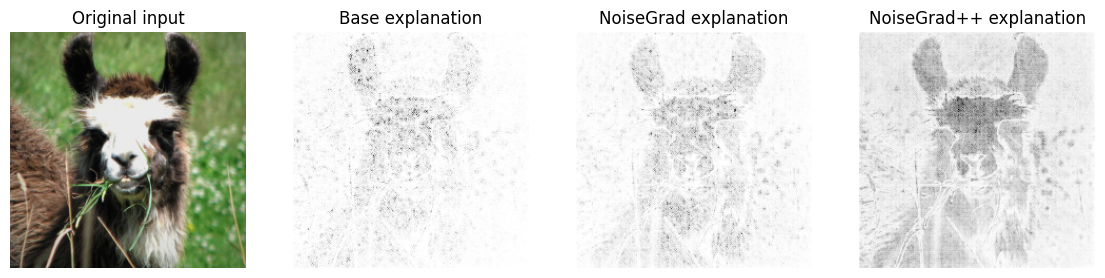

In [28]:
# Plot!
image_classification.visualize_explanations(
    image=normalised_image[0],
    expl_base=np.moveaxis(expl_base.numpy(), 0, -1),
    expl_ng=np.moveaxis(expl_ng.numpy(), 0, -1),
    expl_ngp=np.moveaxis(expl_ngp.numpy(), 0, -1),
    cmap="gist_gray_r",
)
# plt.tight_layout()
# plt.savefig(os.path.realpath('..') + "/samples/resulting_explanation.png")